# Preprocessing and cleaning of the data part 2

In [144]:
import pandas as pd

In [145]:
data = pd.read_csv("../../data/data_new.csv")

In [146]:
data.head()

,"PESSOA, PIPEDRIVE",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 59,Unnamed: 60,"COBRANÇA, VINDI",Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
def column_label_to_index(col_label):
    col_index = 0
    for c in col_label.upper():
        col_index = col_index * 26 + (ord(c) - ord('A') + 1)
    return col_index - 1


def add_prefix_to_first_row(dataframe, prefix, start_col_label, end_col_label):
    start_col = column_label_to_index(start_col_label)
    end_col = column_label_to_index(end_col_label)
    for col in range(start_col, end_col + 1):
        dataframe.iat[0, col] = prefix + dataframe.iat[0, col]

In [148]:
add_prefix_to_first_row(data, 'PESSOA_PIPEDRIVE_', 'A', 'R')
add_prefix_to_first_row(data, 'FUNIL_ASSINATURA_PIPEDRIVE_', 'S', 'X')
add_prefix_to_first_row(data, 'FUNIL_ONBOARDING_PIPEDRIVE_', 'Y', 'AH')
add_prefix_to_first_row(data, 'ATENDIMENTOS_AGENDA_', 'AI', 'AU')
add_prefix_to_first_row(data, 'WHOQOL_', 'AV', 'AZ')
add_prefix_to_first_row(data, 'COMUNICARE_', 'BA', 'BA')
add_prefix_to_first_row(data, 'TWILIO_', 'BB', 'BI')
add_prefix_to_first_row(data, 'COBRANÇA_VINDI_', 'BJ', 'BQ')

In [149]:
data.columns = data.iloc[0]
data = data.drop(data.index[0])

In [150]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
import missingno as msno

<Axes: xlabel='0'>

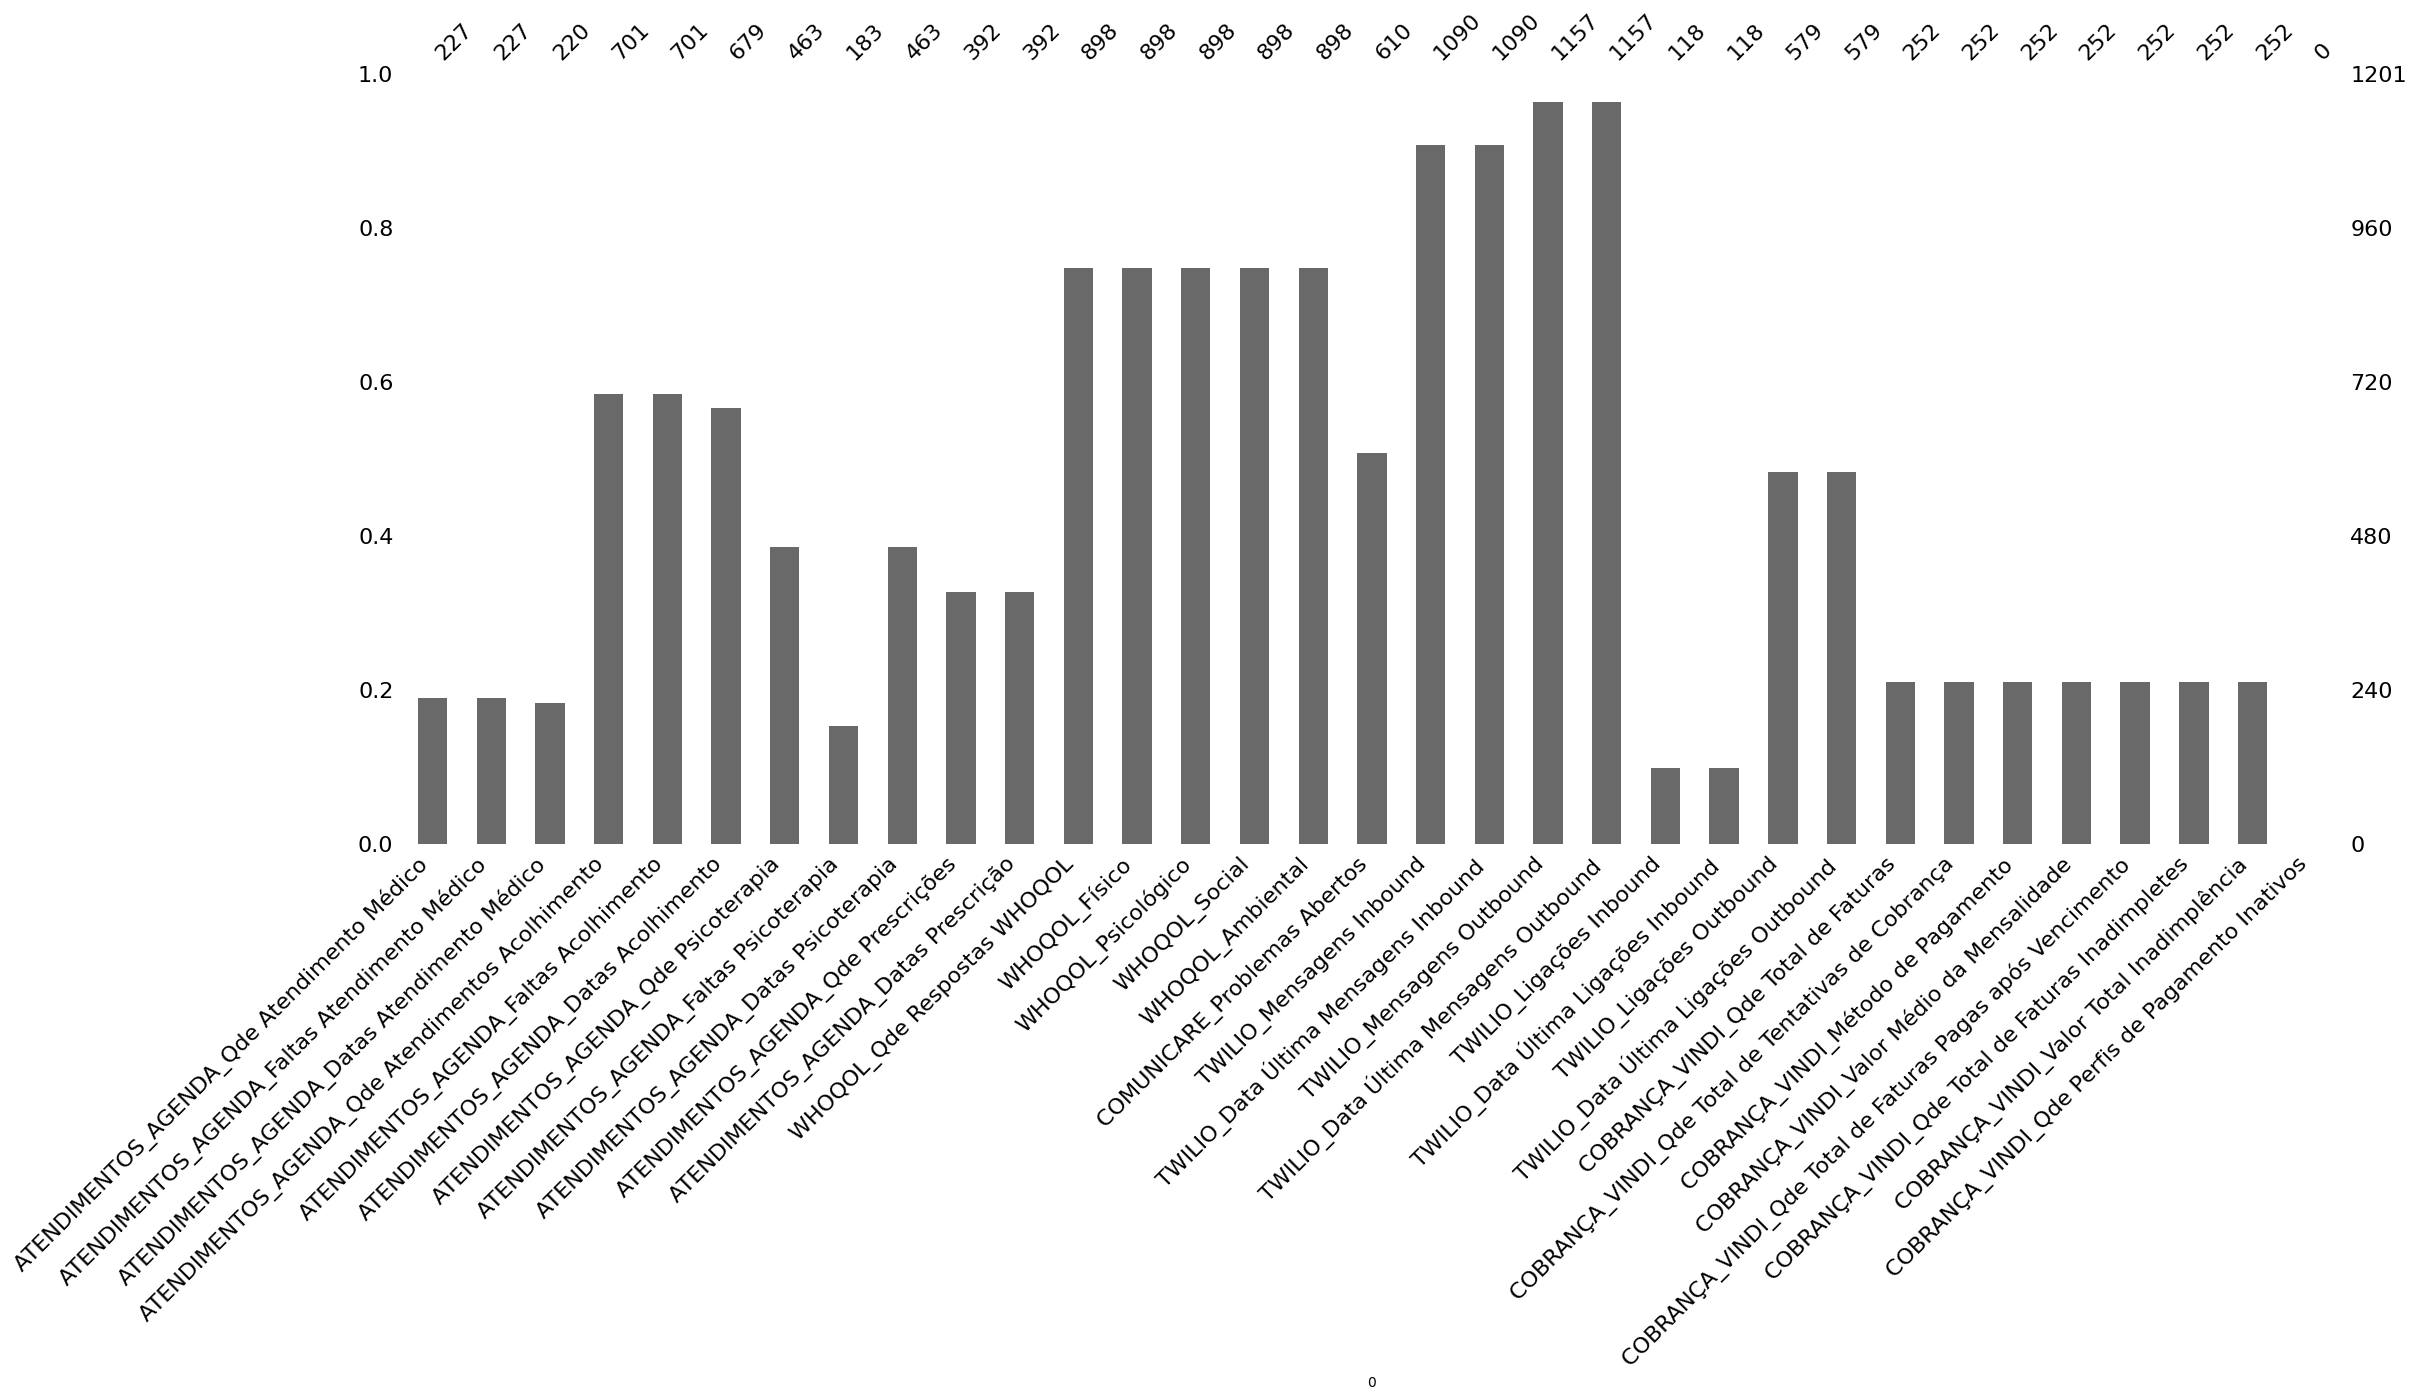

In [152]:
msno.bar(data.iloc[:,36:])

## Dropping columns with no information 2

    - ATENDIMENTOS_AGENDA_Faltas Psicoterapia: Contagem das faltas considerando apenas as sessões de psicoterapia
    
    - TWILIO_Ligações Inbound:  Contagem de ligação feitas pela pessoa

    - TWILIO_Data Última Ligações Inbound: Data da última ligação feitas pela pessoa

    - COBRANÇA_VINDI_Qde Total de Faturas : Contagem de faturas emitidas para associados PF

    - COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança: Contagem das tentativas de cobrança para associados PF

    - COBRANÇA_VINDI_Método de Pagamento : Método de pagamento utilizado por associados PF: Cartão de Crédito, Boleto, Dinheiro (Pix)

    - COBRANÇA_VINDI_Valor Médio da Mensalidade : Média do valor cobrado por mês de associados PF

    - COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento : Contagem de faturas pagas após o vencimento de associados PF

    - COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes : Contagem de faturas vendidas de associados PF

    - COBRANÇA_VINDI_Valor Total Inadimplência : Soma do valor das faturas vencidas de associados PF


In [153]:
data["ATENDIMENTOS_AGENDA_Faltas Psicoterapia"].value_counts()

ATENDIMENTOS_AGENDA_Faltas Psicoterapia
1     87
2     36
3     19
4     14
5      8
8      7
6      7
7      4
10     1
Name: count, dtype: int64

In [154]:
data["TWILIO_Ligações Inbound"].value_counts()

TWILIO_Ligações Inbound
1     73
2     17
3      9
4      7
10     3
6      2
12     1
80     1
7      1
8      1
5      1
46     1
9      1
Name: count, dtype: int64

In [155]:
data["TWILIO_Data Última Ligações Inbound"].value_counts()

TWILIO_Data Última Ligações Inbound
2023-07-11 00:57:34    3
2023-04-21 15:35:54    2
2023-07-04 01:30:01    2
2022-09-29 11:53:43    1
2023-06-10 19:18:13    1
                      ..
2022-05-11 09:41:48    1
2022-05-08 13:19:22    1
2022-08-08 12:22:12    1
2023-09-16 14:21:26    1
2023-10-07 09:45:19    1
Name: count, Length: 114, dtype: int64

In [156]:
data["COBRANÇA_VINDI_Qde Total de Faturas"].value_counts()

COBRANÇA_VINDI_Qde Total de Faturas
3     36
2     34
8     24
1     23
5     21
4     20
7     14
6     14
9     10
10    10
14     9
13     8
11     8
15     5
12     5
16     3
17     2
20     2
21     1
23     1
18     1
30     1
Name: count, dtype: int64

In [157]:
data["COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança"].value_counts()

COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança
2     28
3     23
7     21
1     18
5     18
4     15
8     15
12    12
9     12
14    11
11    10
6     10
16     7
13     6
10     5
15     5
17     5
0      5
32     3
21     3
25     2
27     2
20     2
18     2
19     2
24     2
29     2
40     1
37     1
35     1
23     1
41     1
30     1
Name: count, dtype: int64

In [158]:
data["COBRANÇA_VINDI_Método de Pagamento"].value_counts()

COBRANÇA_VINDI_Método de Pagamento
Cartão de crédito    227
Dinheiro              15
Boleto YaPay           9
Pix                    1
Name: count, dtype: int64

In [159]:
data["COBRANÇA_VINDI_Valor Médio da Mensalidade"].value_counts()

COBRANÇA_VINDI_Valor Médio da Mensalidade
88.00     99
120.00    54
78.00     49
60.00      7
50.00      7
70.00      6
78.41      2
88.28      2
102.50     1
121.80     1
120.63     1
114.40     1
89.29      1
81.71      1
58.70      1
84.00      1
176.00     1
86.33      1
120.49     1
89.81      1
91.54      1
89.64      1
88.49      1
106.67     1
78.90      1
83.04      1
350.00     1
89.04      1
158.40     1
88.95      1
234.00     1
383.75     1
99.36      1
78.46      1
Name: count, dtype: int64

In [160]:
data["COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento"].value_counts()

COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento
0    148
1     54
2     20
3     13
4      8
7      4
5      2
8      1
9      1
6      1
Name: count, dtype: int64

In [161]:
data["COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes"].value_counts()

COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes
0    218
1     21
2      6
3      4
4      1
6      1
7      1
Name: count, dtype: int64

In [162]:
data["COBRANÇA_VINDI_Valor Total Inadimplência"].value_counts()

COBRANÇA_VINDI_Valor Total Inadimplência
0         218
88.00       7
120.00      7
78.00       3
234.00      2
156.00      2
264.00      2
352.00      2
50.00       2
158.40      1
312.00      1
350.00      1
420.00      1
616.00      1
176.00      1
60.00       1
Name: count, dtype: int64

In [163]:
data = data.drop(["ATENDIMENTOS_AGENDA_Faltas Psicoterapia","TWILIO_Ligações Inbound", "TWILIO_Data Última Ligações Inbound","COBRANÇA_VINDI_Qde Total de Faturas","COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança","COBRANÇA_VINDI_Método de Pagamento","COBRANÇA_VINDI_Valor Médio da Mensalidade","COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento","COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes","COBRANÇA_VINDI_Valor Total Inadimplência"], axis=1)

Analisando as colunas com mais de 80% de valores não nulos

## ATENDIMENTOS_AGENDA_Qde Psicoterapia

Descrição : Contagem de sessões de psicoterapia realizadas com a Ana Health

Observação : Valores Nan podem ser consideradores como "não realizou sessões de psicoterapia", então iremos preencher com 0


In [164]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].value_counts(sort=False)

ATENDIMENTOS_AGENDA_Qde Psicoterapia
24     6
18     7
16    14
65     1
14    17
6     25
1     62
32     1
23     4
19    14
25     8
5     27
11    14
10    21
17     8
7     12
4     18
50     1
8     22
2     38
9     10
28     3
21     4
26     4
12     6
27     8
22     8
35     2
3     42
31     3
55     1
51     1
59     1
13     7
39     3
47     1
61     1
15     6
33     2
41     1
20    10
43     2
84     1
30     2
40     2
34     2
48     3
45     1
46     1
36     2
42     2
44     1
Name: count, dtype: int64

In [165]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].fillna(0)

1       0
2       0
3       0
4       0
5       0
       ..
1197    0
1198    0
1199    0
1200    0
1201    0
Name: ATENDIMENTOS_AGENDA_Qde Psicoterapia, Length: 1201, dtype: object

## ATENDIMENTOS_AGENDA_Datas Psicoterapia

Descrição : Datas das sessões de psicoterapia


Observação : Criamos uma nova Coluna ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente, que informa se a pessoa realizou uma sessão de psicoterapia há um tempo menor que a mediana da coluna


In [166]:
data["ATENDIMENTOS_AGENDA_Datas Psicoterapia"]

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1197    NaN
1198    NaN
1199    NaN
1200    NaN
1201    NaN
Name: ATENDIMENTOS_AGENDA_Datas Psicoterapia, Length: 1201, dtype: object

In [167]:
# data["ATENDIMENTOS_AGENDA_Datas Psicoterapia Tempo passado"].median()

In [168]:
# data["ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente"] = data["ATENDIMENTOS_AGENDA_Datas Psicoterapia Tempo passado"] < data["ATENDIMENTOS_AGENDA_Datas Psicoterapia Tempo passado"].median()

In [169]:
# data["ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente"].value_counts()

## WHOQOL_Qde Respostas WHOQOL

Descrição : Contagem de respostas do questionaário de qualidade de vida WHOQOL

Observação : Iremos dropar a coluna por não ter relevância no modelo

<Axes: >

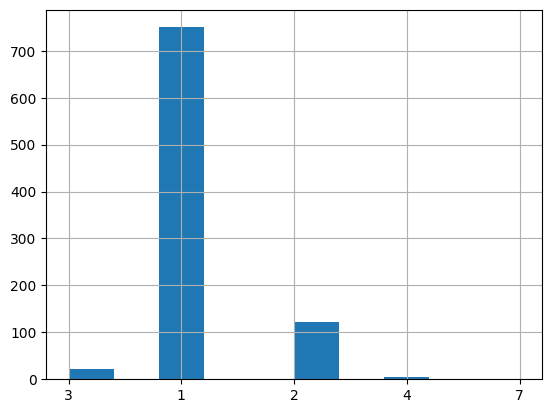

In [170]:
data["WHOQOL_Qde Respostas WHOQOL"].hist()

In [171]:
data["WHOQOL_Qde Respostas WHOQOL"].value_counts()

WHOQOL_Qde Respostas WHOQOL
1    750
2    121
3     21
4      5
7      1
Name: count, dtype: int64

In [172]:
data = data.drop(columns="WHOQOL_Qde Respostas WHOQOL")

## WHOQOL_Físico

    -Descrição : Nota dos aspectos físicos no questionário WHOQOL

    -Observação : Alguns valores possuem mais de uma nota, portanto foi pego a ultima nota da lista, e, por ser uma coluna de valores ordinários, os valores nulos foram preenchidos com a mediana da coluna em uma nova coluna "WHOQOL_Físico_New"


In [173]:
data["WHOQOL_Físico"].value_counts()

WHOQOL_Físico
3,90        64
3,70        63
4,10        63
4,00        59
3,60        58
            ..
4,4; 4,1     1
3,6; 4,9     1
4,0; 4,9     1
4,3; 4,7     1
3,4; 3,4     1
Name: count, Length: 139, dtype: int64

In [174]:
data["WHOQOL_Físico_New"] = data["WHOQOL_Físico"].str.split(';').str[-1].str.strip()

<Axes: >

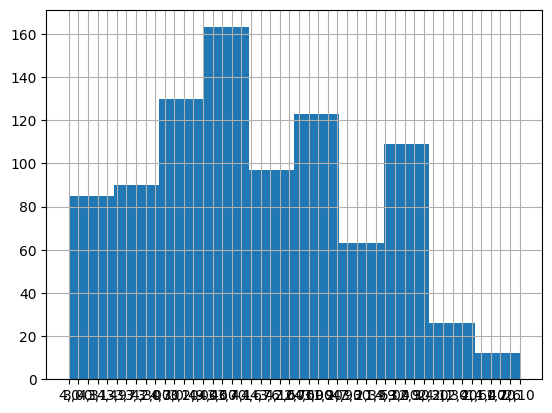

In [175]:
data["WHOQOL_Físico_New"].hist()

In [176]:
data["WHOQOL_Físico_New"] = data["WHOQOL_Físico_New"].str.replace(",",".")

In [177]:
data["WHOQOL_Físico_New"] = data["WHOQOL_Físico_New"].astype(float) 

In [178]:
mediana = data["WHOQOL_Físico_New"].median()
mediana

3.7

In [179]:
data["WHOQOL_Físico_New"] = data["WHOQOL_Físico_New"].fillna(mediana)

<Axes: >

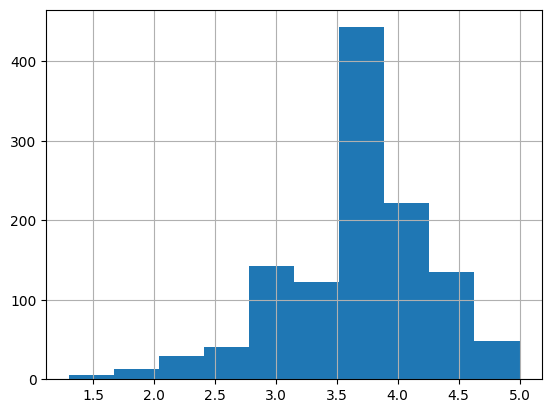

In [180]:
data["WHOQOL_Físico_New"].hist()

## WHOQOL_Psicológico

    -Descrição : Nota dos aspectos psicológicos no questionário WHOQOL


    -Observação : Alguns valores possuem mais de uma nota, portanto foi pego a ultima nota da lista, e, por ser uma coluna de valores ordinários, os valores nulos foram preenchidos com a mediana da coluna em uma nova coluna "WHOQOL_Psicológico_New"


In [181]:
data["WHOQOL_Psicológico"].value_counts()

WHOQOL_Psicológico
4                275
3                247
2                 58
5                 43
3,3               16
                ... 
3,7; 4,0; 3,3      1
3,2; 3,3; 3,3      1
3,7; 3,2           1
4,2; 4,7           1
3,2; 3,2           1
Name: count, Length: 130, dtype: int64

In [182]:
data["WHOQOL_Psicológico_New"] = data["WHOQOL_Psicológico"].str.split(';').str[-1].str.strip()

<Axes: >

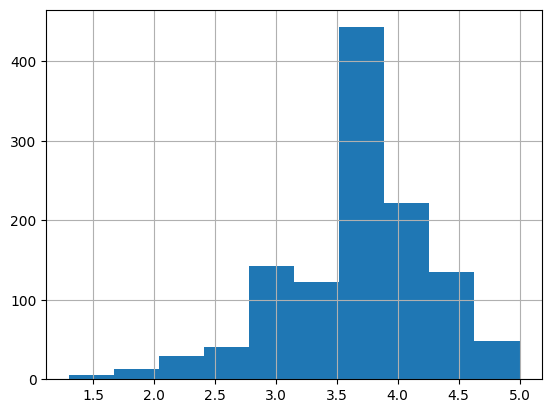

In [183]:
data["WHOQOL_Físico_New"].hist()

In [184]:
data["WHOQOL_Psicológico_New"] = data["WHOQOL_Psicológico_New"].str.replace(",",".")

In [185]:
data["WHOQOL_Psicológico_New"] = data["WHOQOL_Psicológico_New"].astype(float) 

In [186]:
mediana = data["WHOQOL_Psicológico_New"].median()
mediana

3.5

In [187]:
data["WHOQOL_Psicológico_New"] = data["WHOQOL_Psicológico_New"].fillna(mediana)

<Axes: >

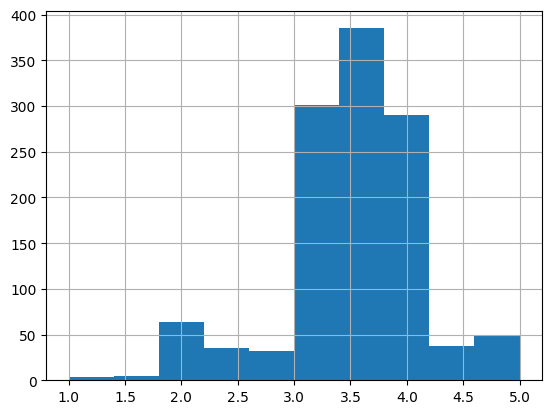

In [188]:
data["WHOQOL_Psicológico_New"].hist()

## WHOQOL_Social

    -Descrição : Nota dos aspectos sociais no questionário WHOQOL


    -Observação : Alguns valores possuem mais de uma nota, portanto foi pego a ultima nota da lista, e, por ser uma coluna de valores ordinários, os valores nulos foram preenchidos com a mediana da coluna em uma nova coluna "WHOQOL_Social_New"


In [189]:
data["WHOQOL_Social"].value_counts()

WHOQOL_Social
4                315
3                215
5                 78
2                 45
3,7               29
                ... 
1,7; 2,3           1
3,3; 3,7; 4,0      1
4,0; 3,7; 3,0      1
3,3; 3,7; 4,7      1
2,3; 1,7           1
Name: count, Length: 95, dtype: int64

In [190]:
data["WHOQOL_Social_New"] = data["WHOQOL_Social"].str.split(';').str[-1].str.strip()

<Axes: >

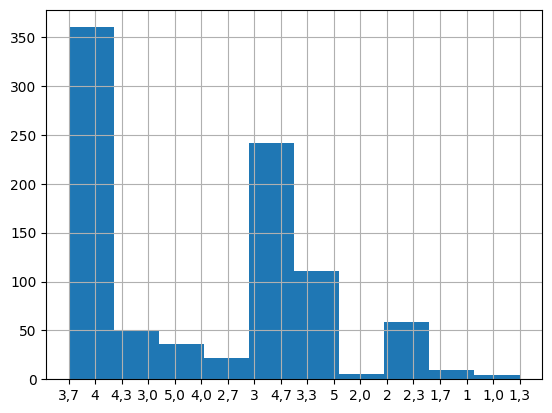

In [191]:
data["WHOQOL_Social_New"].hist()

In [192]:
data["WHOQOL_Social_New"] = data["WHOQOL_Social_New"].str.replace(",",".")

In [193]:
data["WHOQOL_Social_New"] = data["WHOQOL_Social_New"].astype(float) 

In [194]:
mediana = data["WHOQOL_Social_New"].median()
mediana

4.0

In [195]:
data["WHOQOL_Social_New"] = data["WHOQOL_Social_New"].fillna(mediana)

<Axes: >

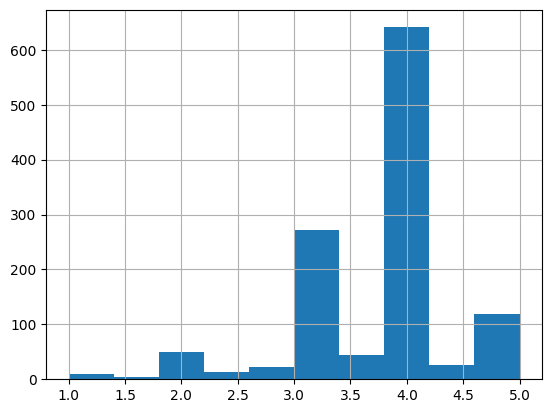

In [196]:
data["WHOQOL_Social_New"].hist()

## WHOQOL_Ambiental

    -Descrição : Nota dos aspectos ambientais no questionário WHOQOL



    -Observação : Alguns valores possuem mais de uma nota, portanto foi pego a ultima nota da lista, e, por ser uma coluna de valores ordinários, os valores nulos foram preenchidos com a mediana da coluna em uma nova coluna "WHOQOL_Ambiental_New"


In [197]:
data["WHOQOL_Ambiental"].value_counts()

WHOQOL_Ambiental
4                323
3                240
5                 37
2                 18
3,9               16
                ... 
3,4; 3,8; 3,6      1
4,3; 3,8           1
4,3; 3,5           1
4,3; 4,9           1
4,3; 4,3           1
Name: count, Length: 142, dtype: int64

In [198]:
data["WHOQOL_Ambiental_New"] = data["WHOQOL_Ambiental"].str.split(';').str[-1].str.strip()

<Axes: >

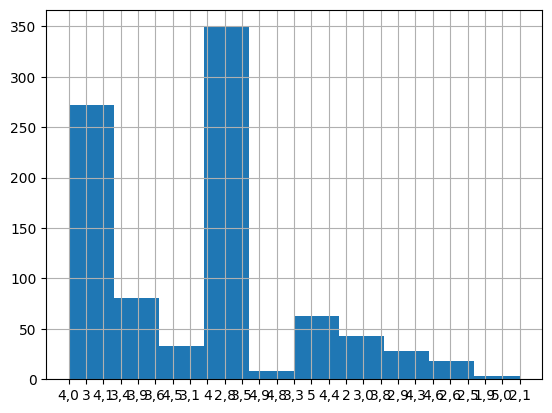

In [199]:
data["WHOQOL_Ambiental_New"].hist()

In [200]:
data["WHOQOL_Ambiental_New"] = data["WHOQOL_Ambiental_New"].str.replace(",",".")

In [201]:
data["WHOQOL_Ambiental_New"] = data["WHOQOL_Ambiental_New"].astype(float) 

In [202]:
mediana = data["WHOQOL_Ambiental_New"].median()
mediana

3.9

In [203]:
data["WHOQOL_Ambiental_New"] = data["WHOQOL_Ambiental_New"].fillna(mediana)

<Axes: >

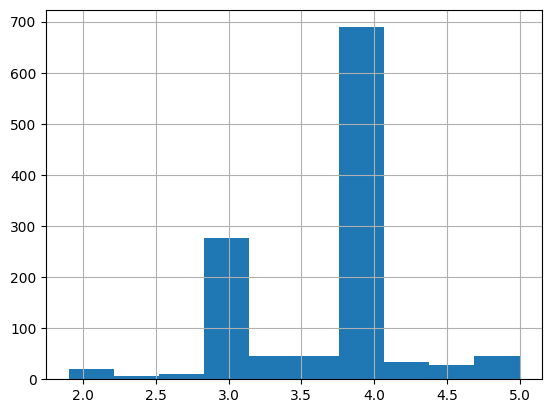

In [204]:
data["WHOQOL_Ambiental_New"].hist()

## COMUNICARE_Problemas Abertos

    -Descrição : Lista de queixas que a pessoa trouxe em atendimento e foram classificadas de acordo com código CIAP2 (Classificação Internacional de Atenção Primária – Segunda Edição), separada por vírgula


    -Observação : Na nossa concepção, é de maior importância saber se a pessoa forneceu queixas no atendimento a saber qual o conteúdo da queixa, portanto nós criamos uma nova coluna booleana, onde o valor é 1 se a houve queixa e 0 caso contrário


In [205]:
data["COMUNICARE_Problemas Abertos"].isna().value_counts()

COMUNICARE_Problemas Abertos
False    610
True     591
Name: count, dtype: int64

In [206]:
data["COMUNICARE_Problemas Abertos Bool"] = data["COMUNICARE_Problemas Abertos"].notnull().astype(int)

In [207]:
data["COMUNICARE_Problemas Abertos Bool"].fillna(0)

1       0
2       0
3       0
4       0
5       0
       ..
1197    1
1198    0
1199    0
1200    0
1201    0
Name: COMUNICARE_Problemas Abertos Bool, Length: 1201, dtype: int64

<Axes: >

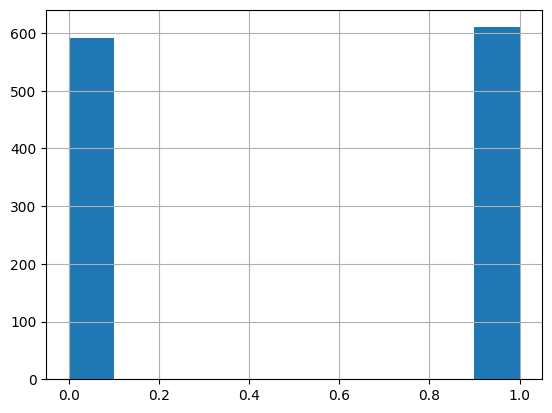

In [208]:
data["COMUNICARE_Problemas Abertos Bool"].hist()

## TWILIO_Mensagens Inbound

    -Descrição : Contagem de mensagens enviadas pela pessoa

    -Observação : Valores Nan foram interpretados como 0 mensagens enviadas pela pessoa, portanto foram preenchidos com o valor 0


In [209]:
data["TWILIO_Mensagens Inbound"].value_counts()

TWILIO_Mensagens Inbound
1      43
3      30
2      29
5      24
4      24
       ..
268     1
418     1
721     1
157     1
257     1
Name: count, Length: 255, dtype: int64

In [210]:
data["TWILIO_Mensagens Inbound"].fillna(0)

1        13
2         0
3         0
4         0
5         0
       ... 
1197      0
1198      0
1199    121
1200      0
1201      0
Name: TWILIO_Mensagens Inbound, Length: 1201, dtype: object

In [211]:
data["TWILIO_Mensagens Inbound"].value_counts()

TWILIO_Mensagens Inbound
1      43
3      30
2      29
5      24
4      24
       ..
268     1
418     1
721     1
157     1
257     1
Name: count, Length: 255, dtype: int64

## TWILIO_Data Última Mensagens Inbound


    -Descrição : Data da última mensagem enviada pela pessoa


    -Observação : Criamos uma nova Coluna TWILIO_Data Última Mensagens Inbound Recente, que informa se a pessoa realizou uma sessão de psicoterapia há um tempo menor que a mediana da coluna


In [212]:
data["TWILIO_Data Última Mensagens Inbound"]

1       2023-01-02 15:36:27
2                       NaN
3                       NaN
4                       NaN
5                       NaN
               ...         
1197                    NaN
1198                    NaN
1199    2023-10-31 14:01:01
1200                    NaN
1201                    NaN
Name: TWILIO_Data Última Mensagens Inbound, Length: 1201, dtype: object

In [213]:
from datetime import datetime

data["TWILIO_Data Última Mensagens Inbound"] = pd.to_datetime(data["TWILIO_Data Última Mensagens Inbound"])

data["TWILIO_Data Última Mensagens Inbound Tempo Passado"] = datetime.now() - data["TWILIO_Data Última Mensagens Inbound"]

data["TWILIO_Data Última Mensagens Inbound Tempo Passado"].fillna('', inplace=True)

In [214]:
data["TWILIO_Data Última Mensagens Inbound Tempo Passado"] = data["TWILIO_Data Última Mensagens Inbound Tempo Passado"].astype(str)

data["TWILIO_Data Última Mensagens Inbound Tempo Passado"] = data["TWILIO_Data Última Mensagens Inbound Tempo Passado"].str.extract('(\d+) days').astype(float)

In [215]:
data["TWILIO_Data Última Mensagens Inbound Recente"] = data["TWILIO_Data Última Mensagens Inbound Tempo Passado"] < data["TWILIO_Data Última Mensagens Inbound Tempo Passado"].median()

In [216]:
data["TWILIO_Data Última Mensagens Inbound Recente"].value_counts()

TWILIO_Data Última Mensagens Inbound Recente
False    656
True     545
Name: count, dtype: int64

<Axes: xlabel='0'>

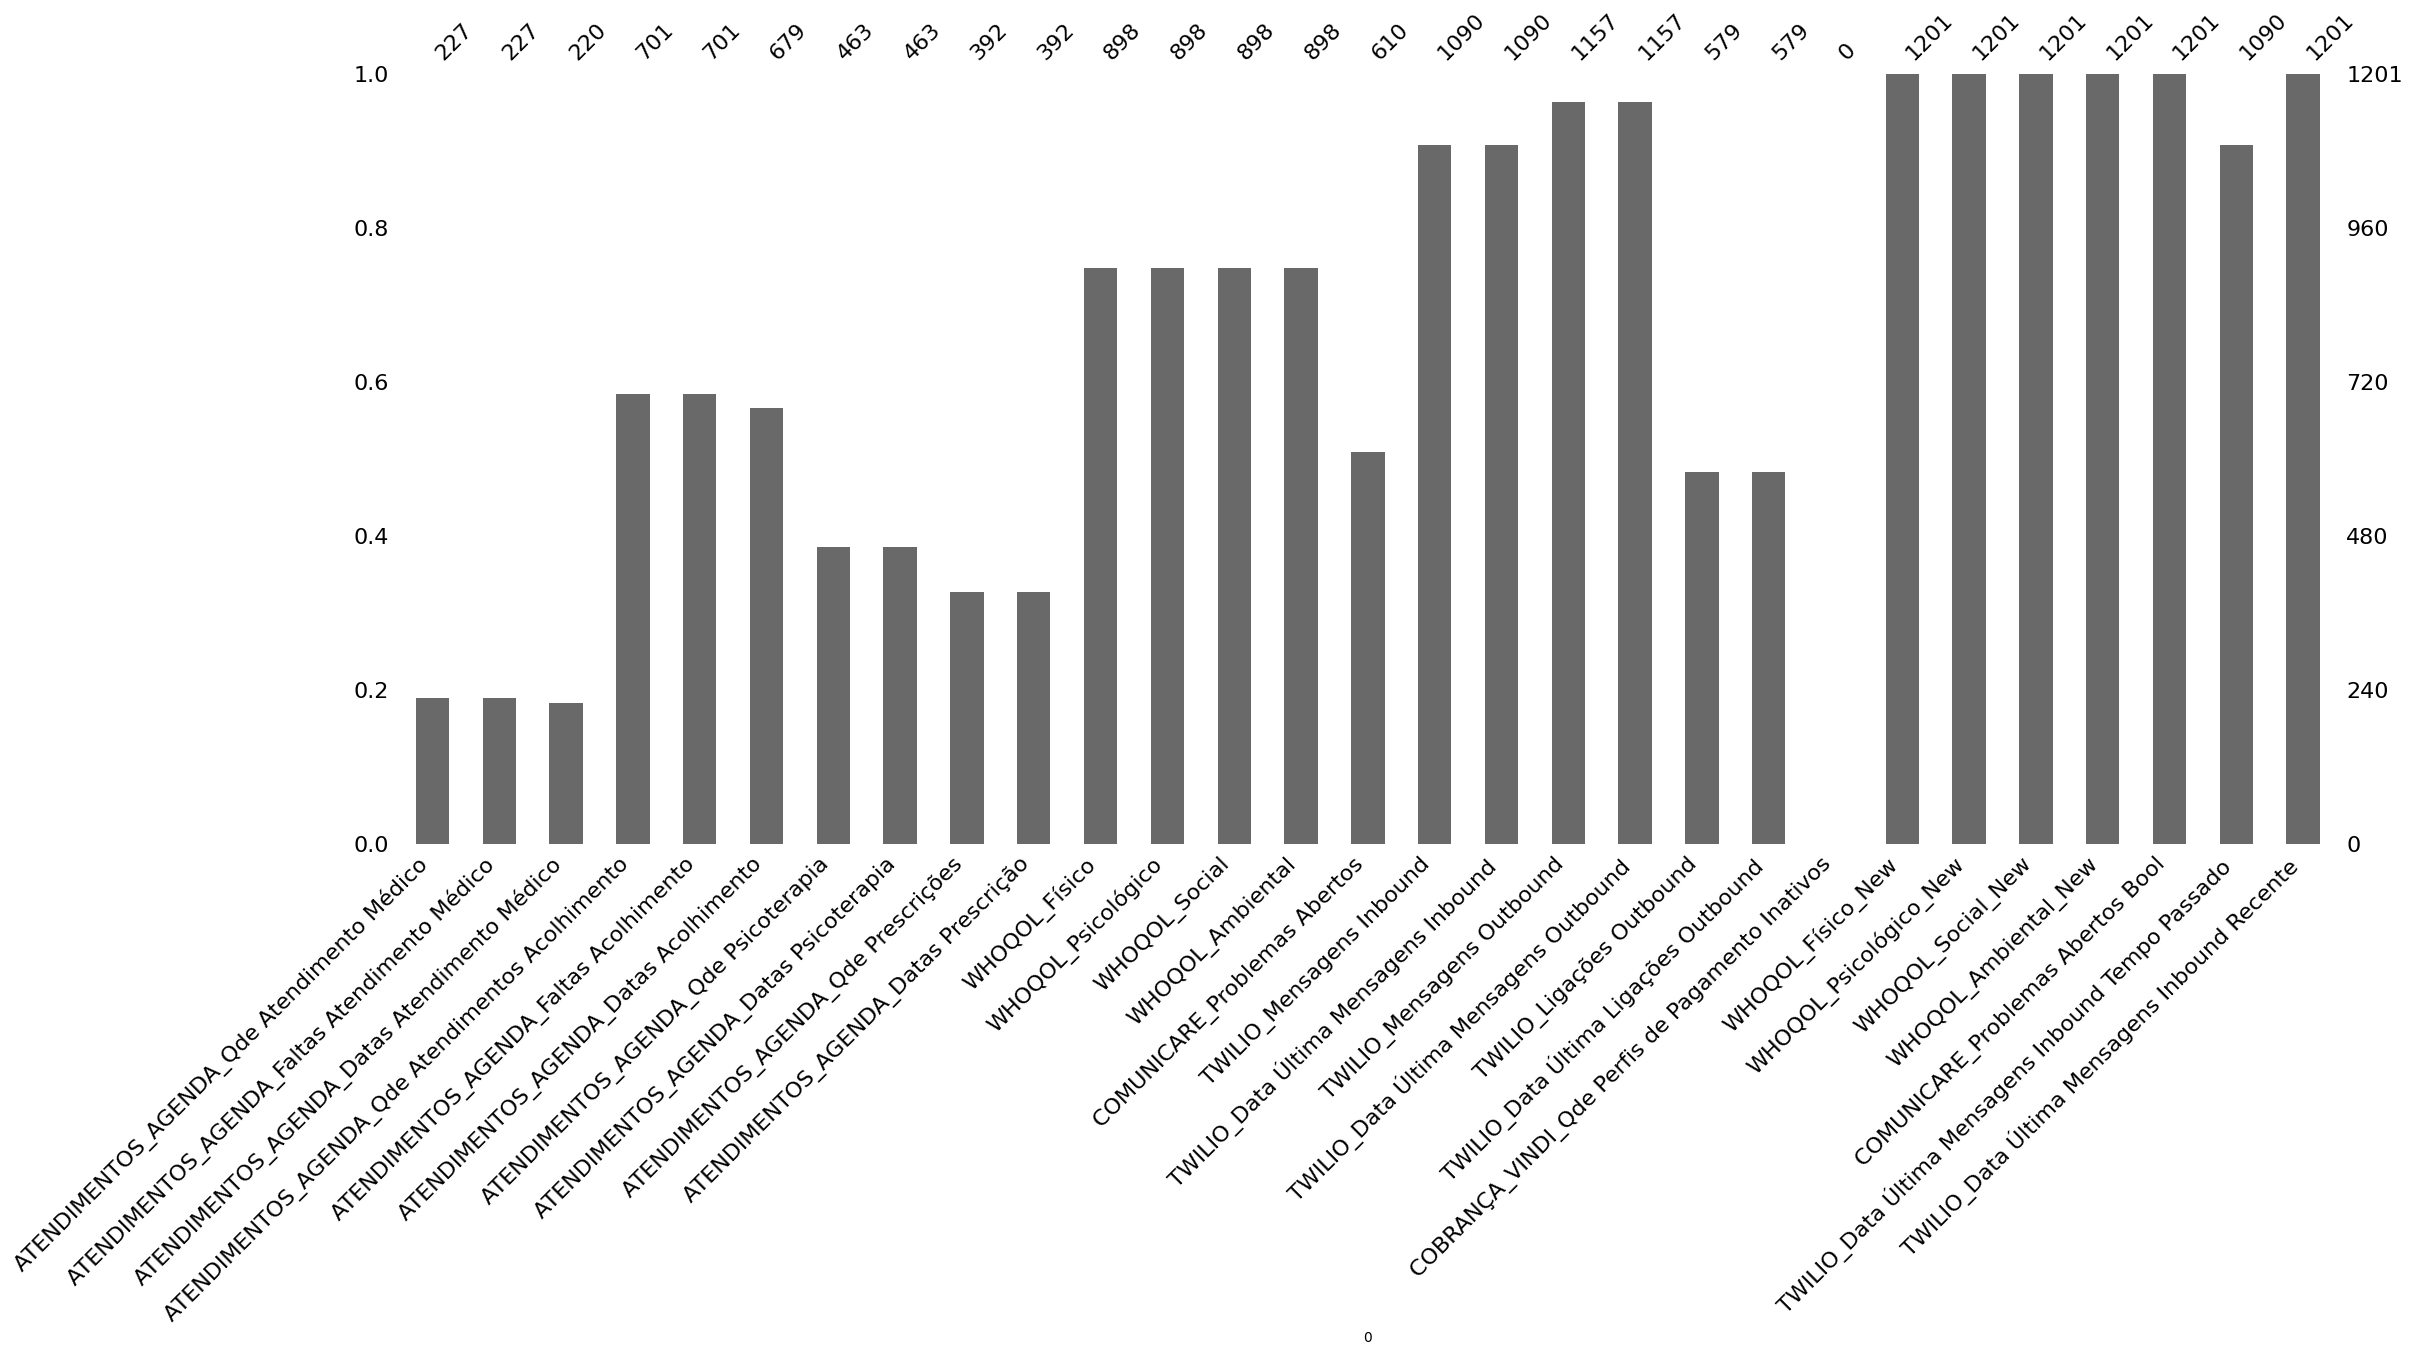

In [217]:
msno.bar(data.iloc[:,36:])

Agora, vamos excluir as colunas que foram bases de novas colunas

In [218]:
data = data.drop(columns=["WHOQOL_Ambiental","WHOQOL_Social","WHOQOL_Físico","WHOQOL_Psicológico","COMUNICARE_Problemas Abertos","TWILIO_Data Última Mensagens Inbound","ATENDIMENTOS_AGENDA_Datas Psicoterapia","TWILIO_Data Última Mensagens Inbound Tempo Passado"])

<Axes: xlabel='0'>

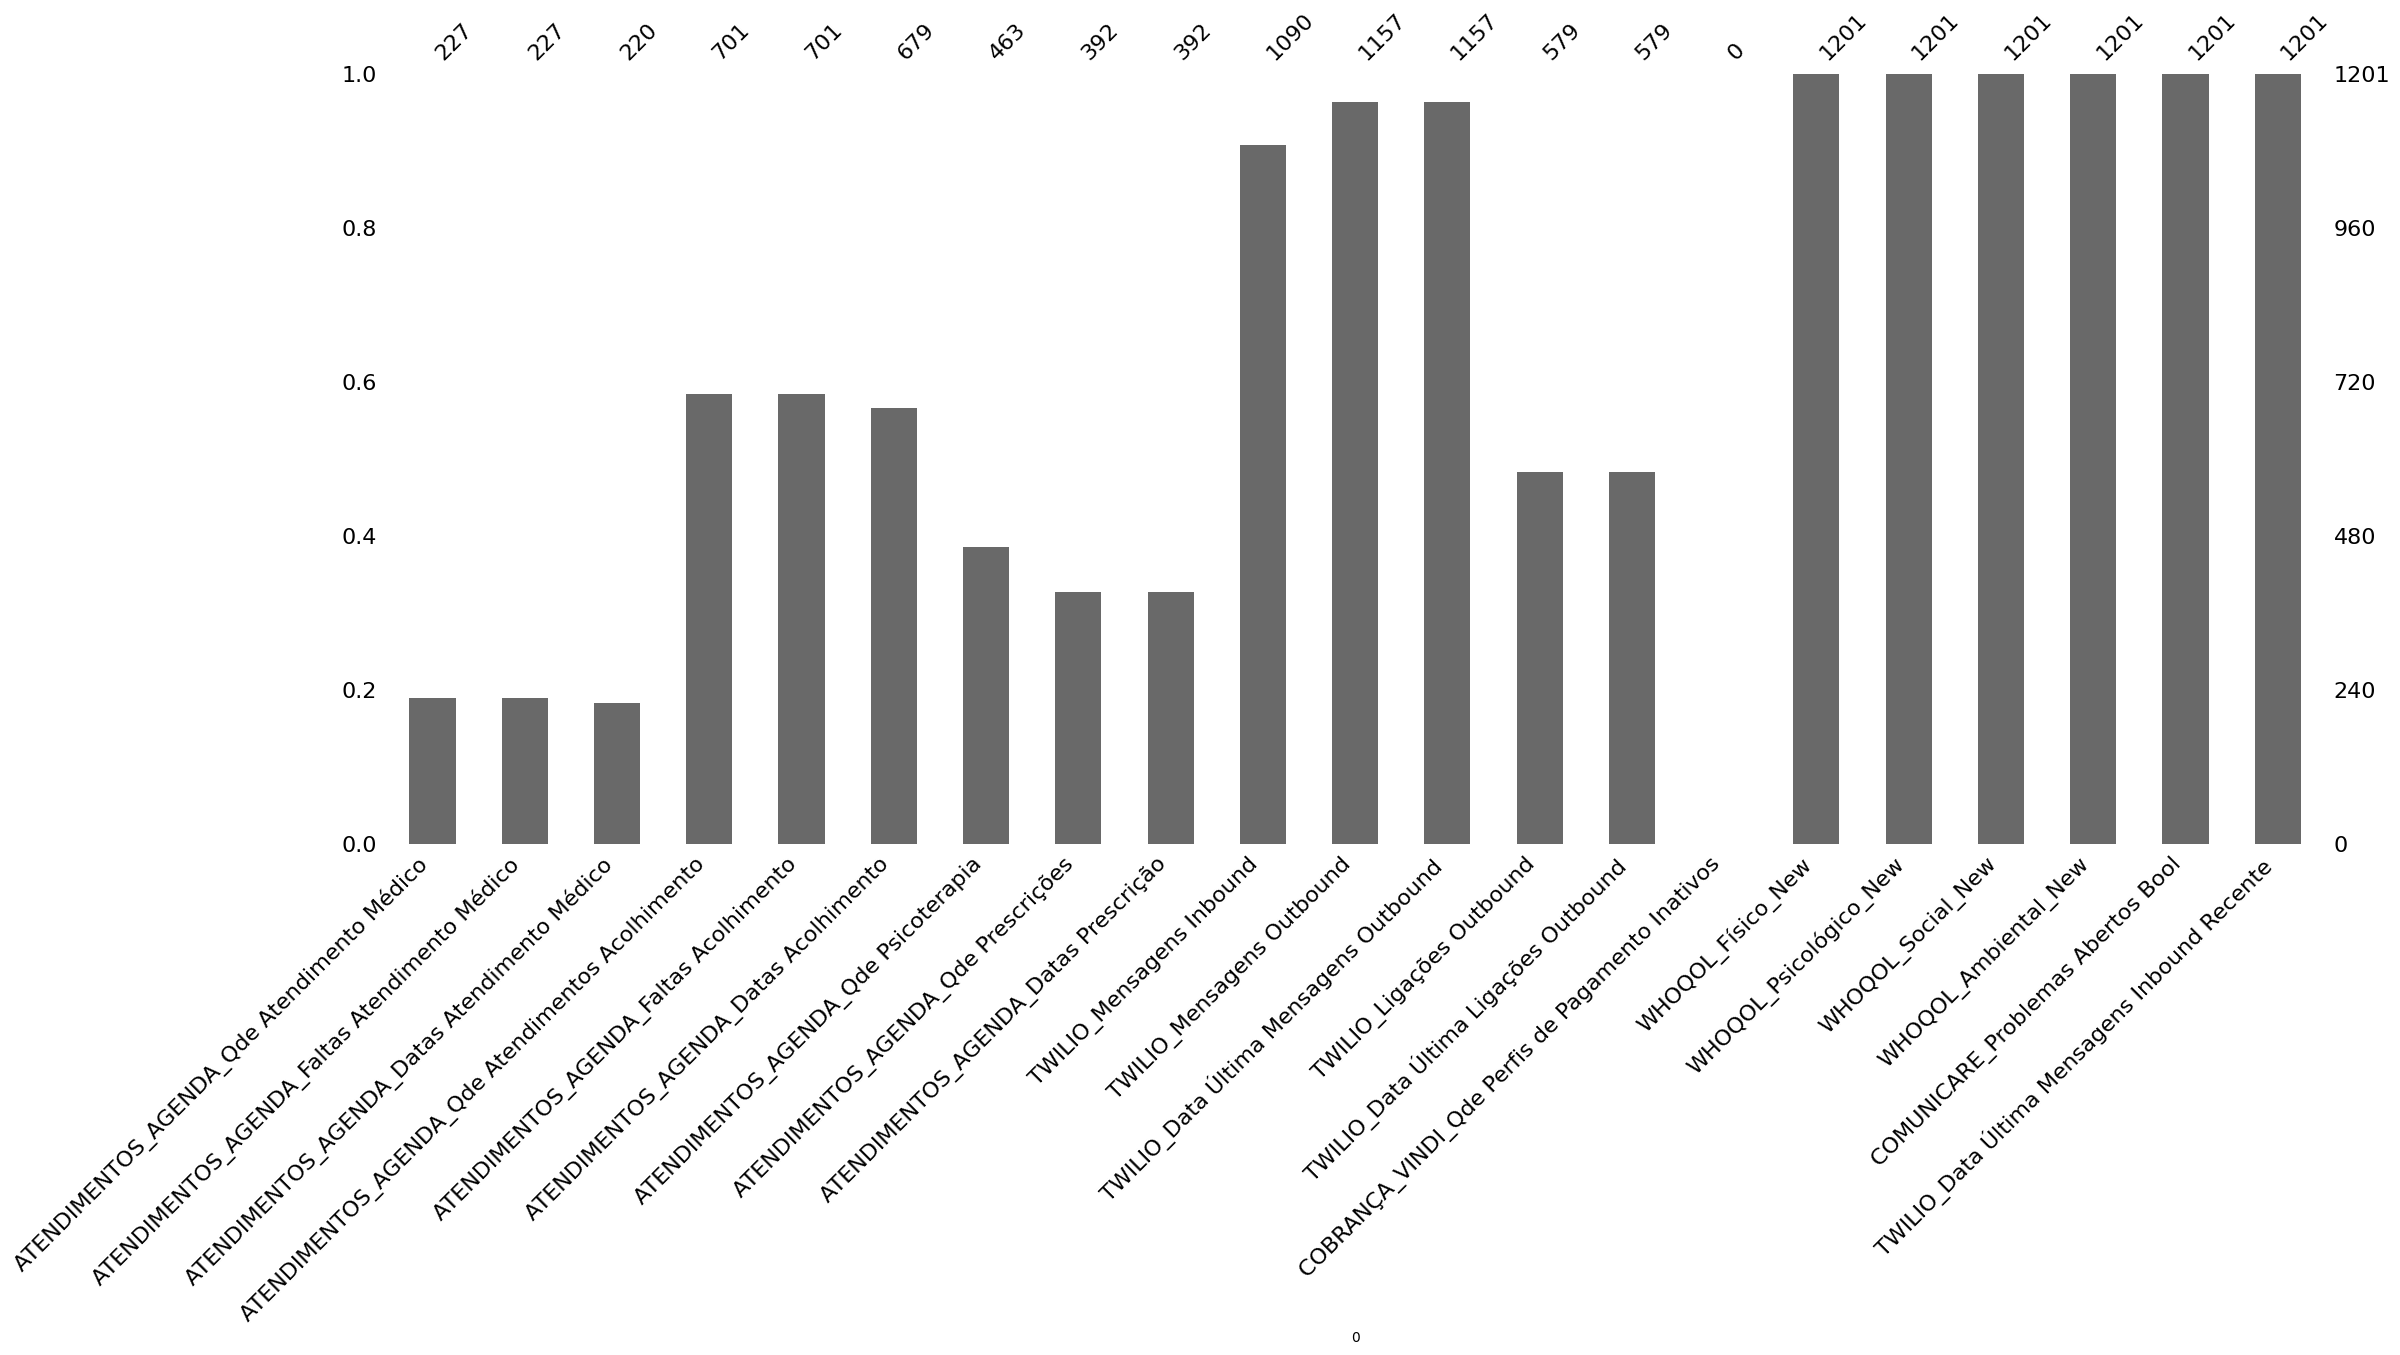

In [219]:
msno.bar(data.iloc[:,36:])

## Anotação 

    - As colunas novas com final "Tempo passado", que representam os dias corridos até a data atual, ainda possuem valores nulos, e não sabemos como lidar com esse valores.